In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [14]:
df = pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [15]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

<Axes: >

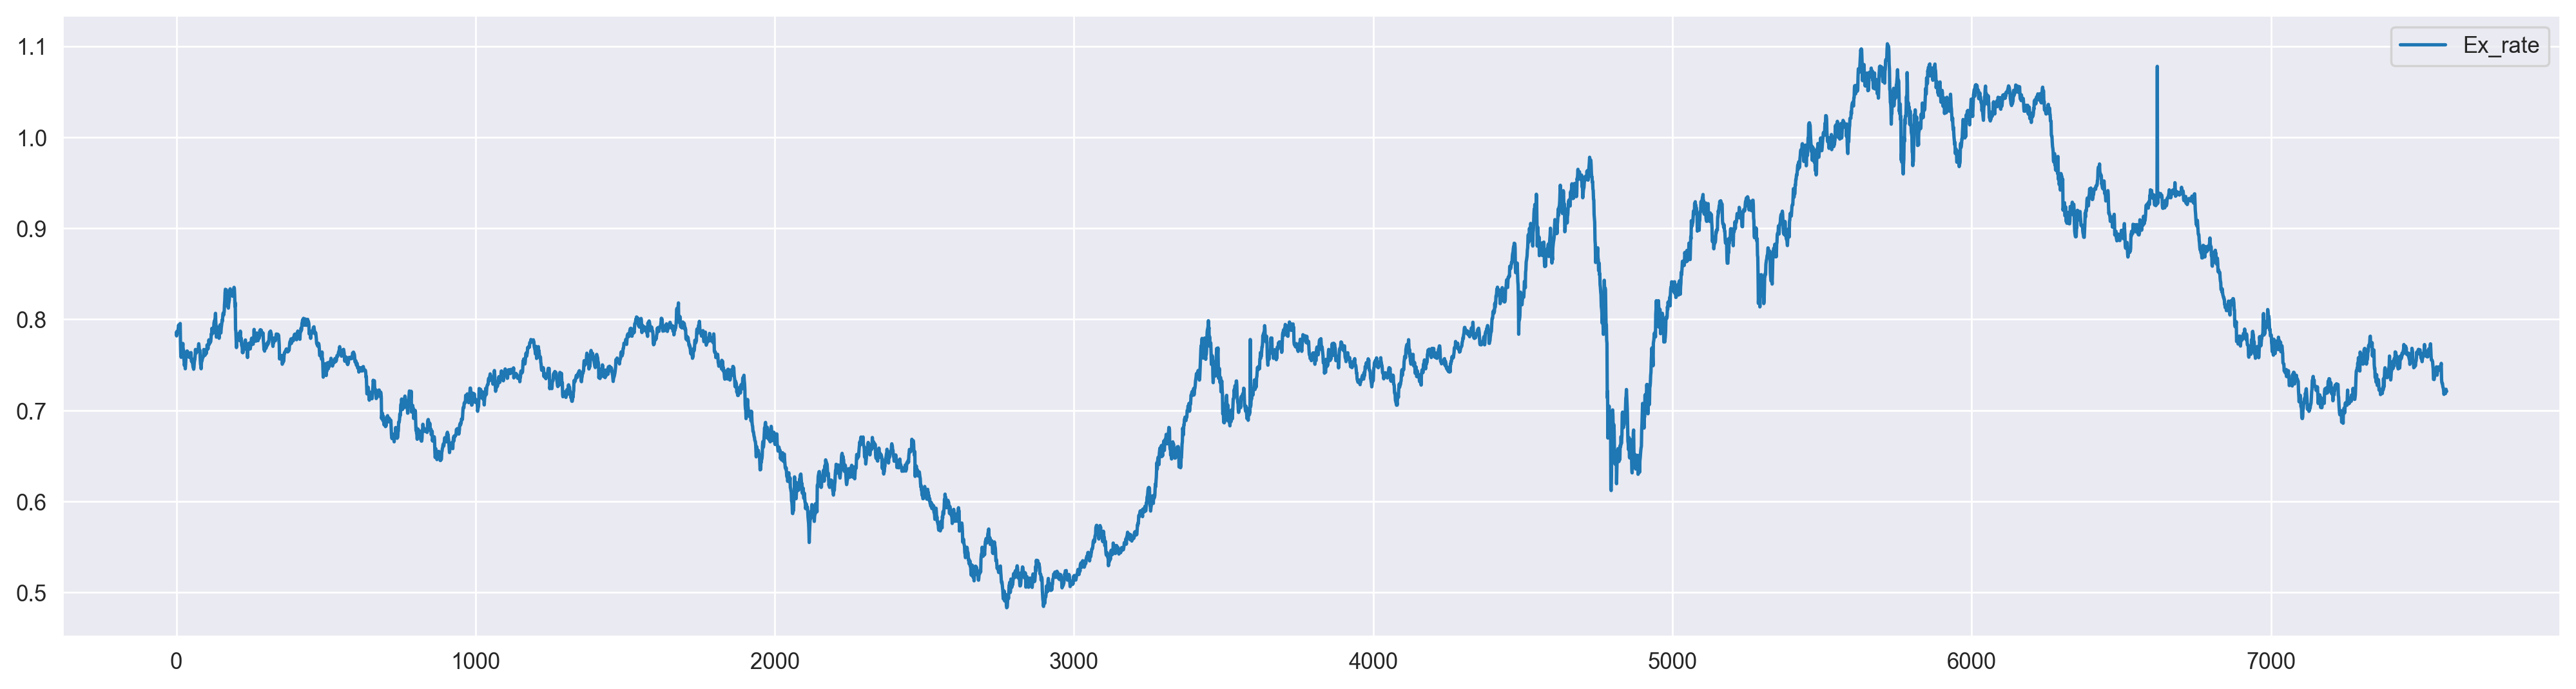

In [16]:
df.plot()

In [17]:
adfuller(df['Ex_rate'])[1]

0.44923273535982894

In [18]:
order = auto_arima(df['Ex_rate'])

In [19]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [20]:
df.shape

(7588, 2)

In [21]:
#Split the data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [44]:

# Convert 'date' to datetime and ensure 'Ex_rate' is numeric
test['date'] = pd.to_datetime(test['date'], format='%d-%m-%Y %H:%M')
test['Ex_rate'] = pd.to_numeric(test['Ex_rate'])

# Assuming ypred contains predicted values and test['Ex_rate'] contains actual values
actual = test['Ex_rate']


In [23]:
train.shape

(7558, 2)

In [24]:
model = ARIMA(train['Ex_rate'], order=(1, 1, 0)).fit()

In [25]:
ypred = model.predict(start =7588, end = 7617)

In [26]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.016634527783604417


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 29 must be < 15.

<Figure size 2500x1250 with 0 Axes>

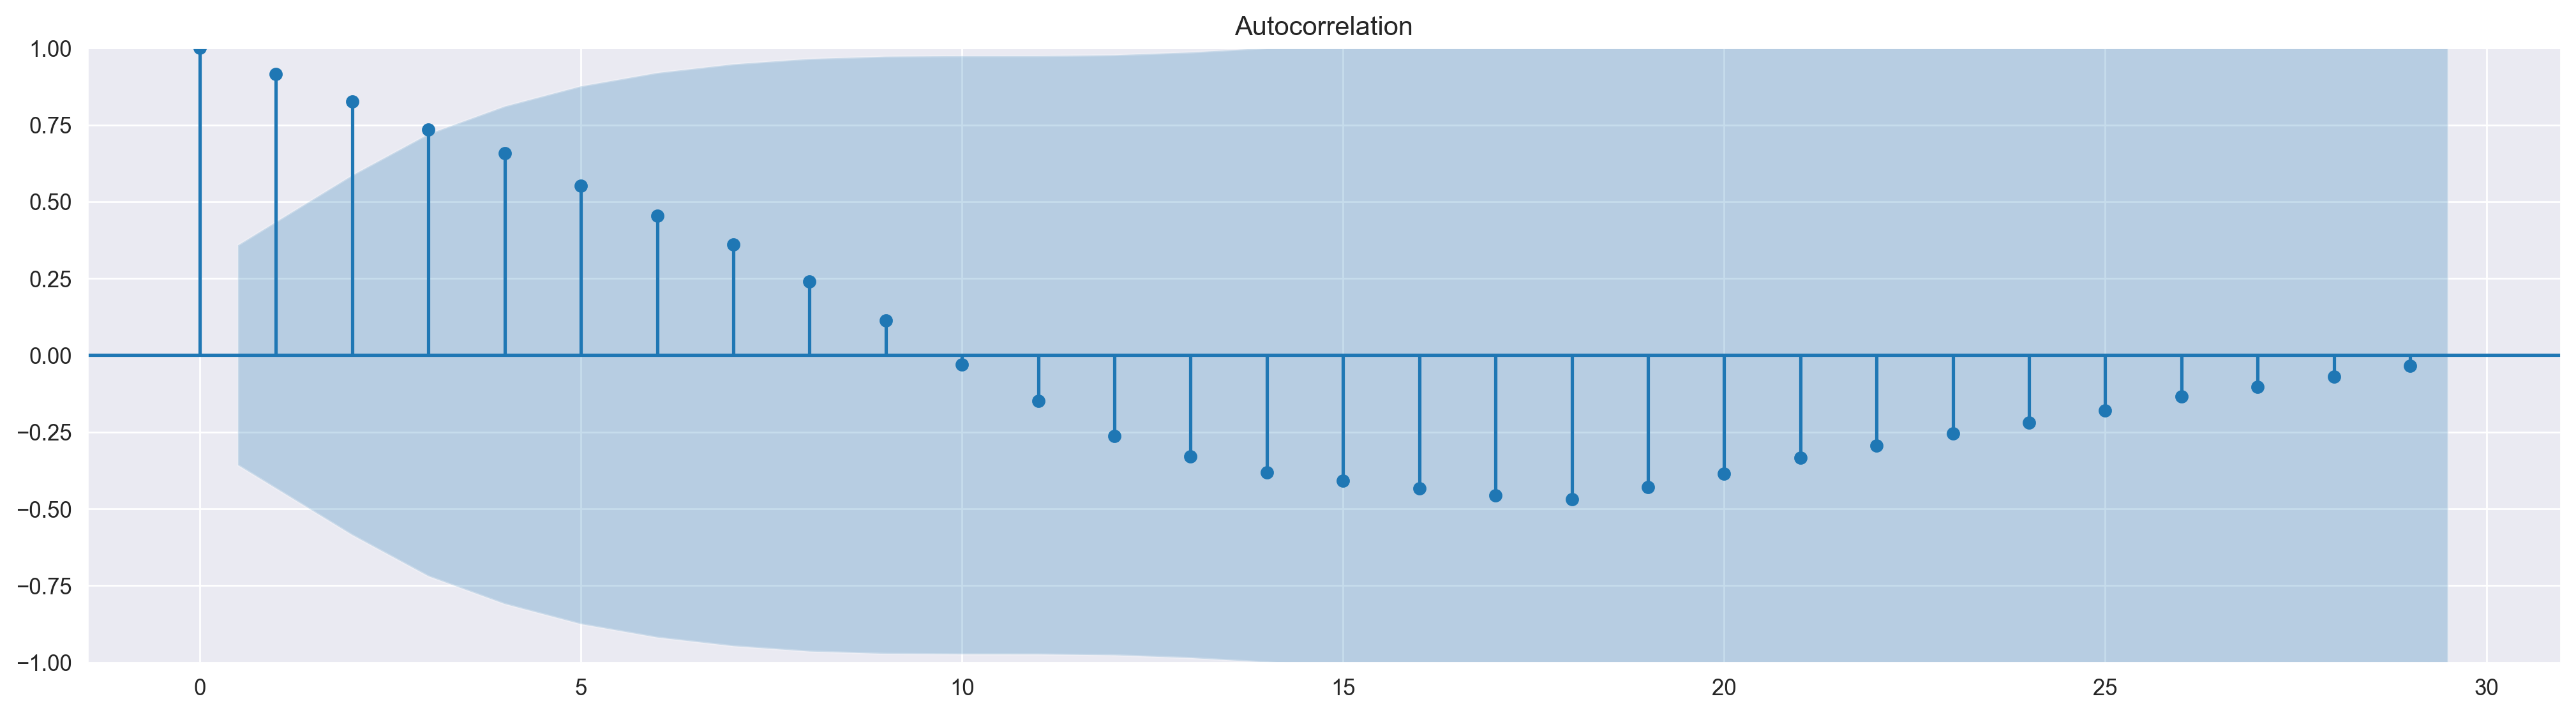

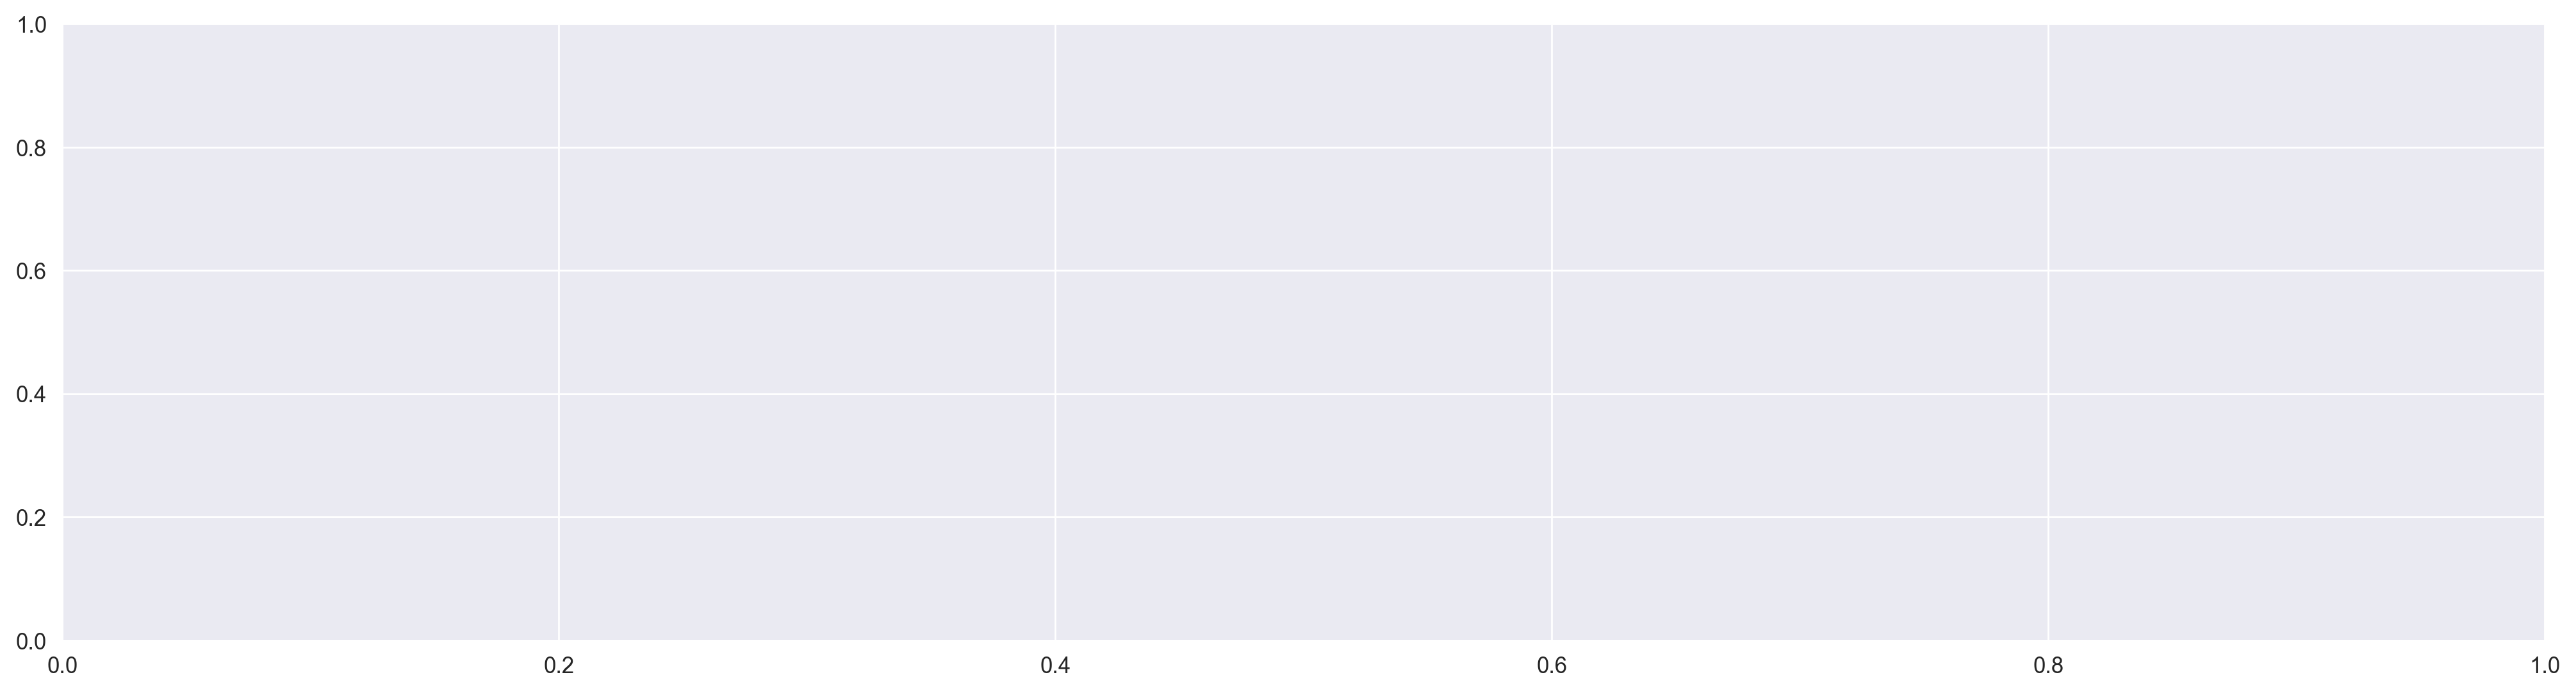

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your time series data
data = test['Ex_rate']  # Assuming 'test' has been preprocessed

# Plot ACF and PACF
plt.figure(figsize=(10, 5))
plot_acf(data, lags=29, title="Autocorrelation")
plot_pacf(data, lags=29, title="Partial Autocorrelation")
plt.show()


In [56]:
# Fit ARIMA model
p, d, q = 1, 1, 0
model = ARIMA(data, order=(p, d, q))  # Replace with your chosen (p, d, q)
model_fit = model.fit()

# Summarize model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                   30
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 120.117
Date:                Mon, 24 Mar 2025   AIC                           -236.233
Time:                        10:33:07   BIC                           -233.499
Sample:                             0   HQIC                          -235.377
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0645      0.334      0.193      0.847      -0.591       0.720
sigma2      1.478e-05   1.82e-06      8.129      0.000    1.12e-05    1.83e-05
Ljung-Box (L1) (Q):                   0.07   Jarque-

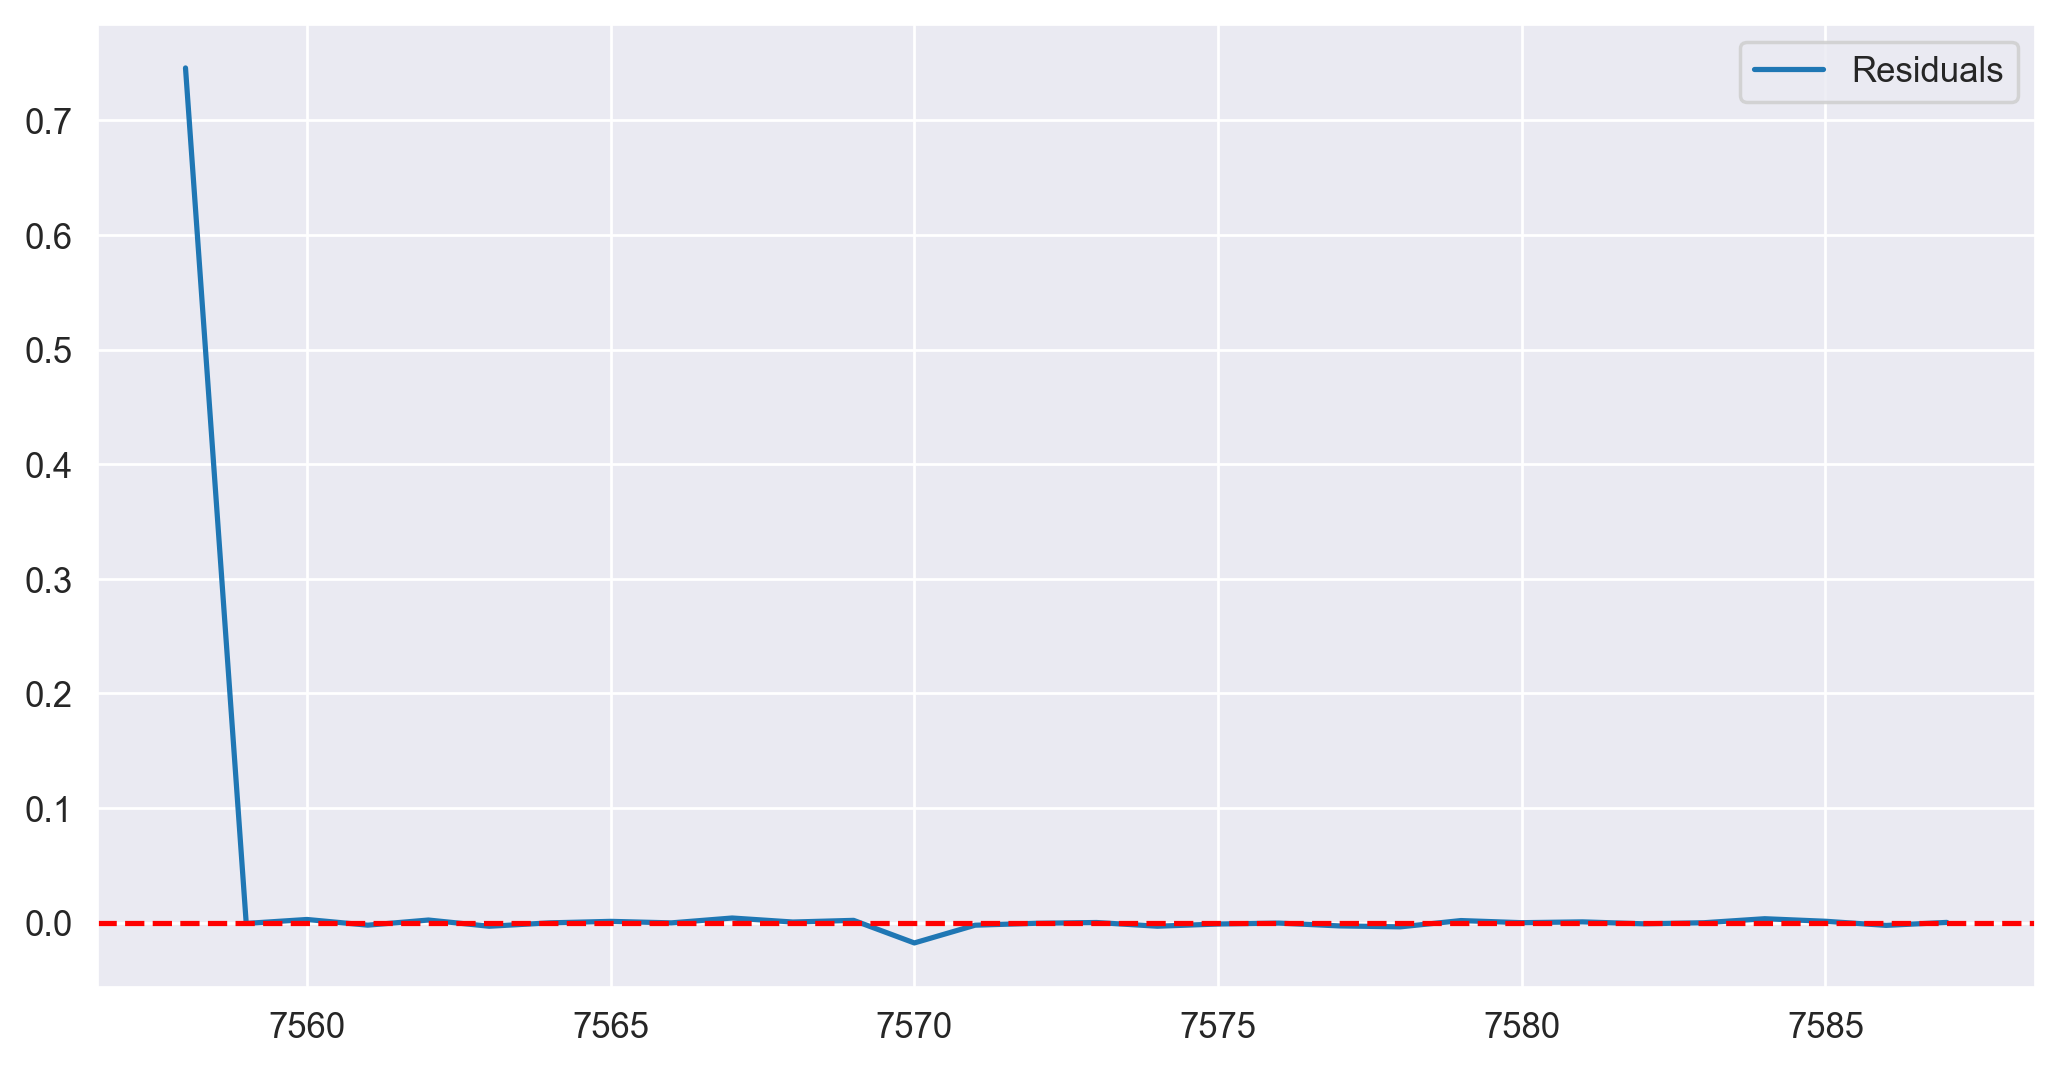

count    30.000000
mean      0.024081
std       0.136362
min      -0.017782
25%      -0.002014
50%      -0.000193
75%       0.001120
max       0.745796
dtype: float64


In [58]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals, label="Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()

# Check residual statistics
print(residuals.describe())


7588    0.720825
7589    0.720825
7590    0.720825
7591    0.720825
7592    0.720825
7593    0.720825
7594    0.720825
7595    0.720825
7596    0.720825
7597    0.720825
7598    0.720825
7599    0.720825
7600    0.720825
7601    0.720825
7602    0.720825
7603    0.720825
7604    0.720825
7605    0.720825
7606    0.720825
7607    0.720825
7608    0.720825
7609    0.720825
7610    0.720825
7611    0.720825
7612    0.720825
7613    0.720825
7614    0.720825
7615    0.720825
7616    0.720825
7617    0.720825
Name: predicted_mean, dtype: float64


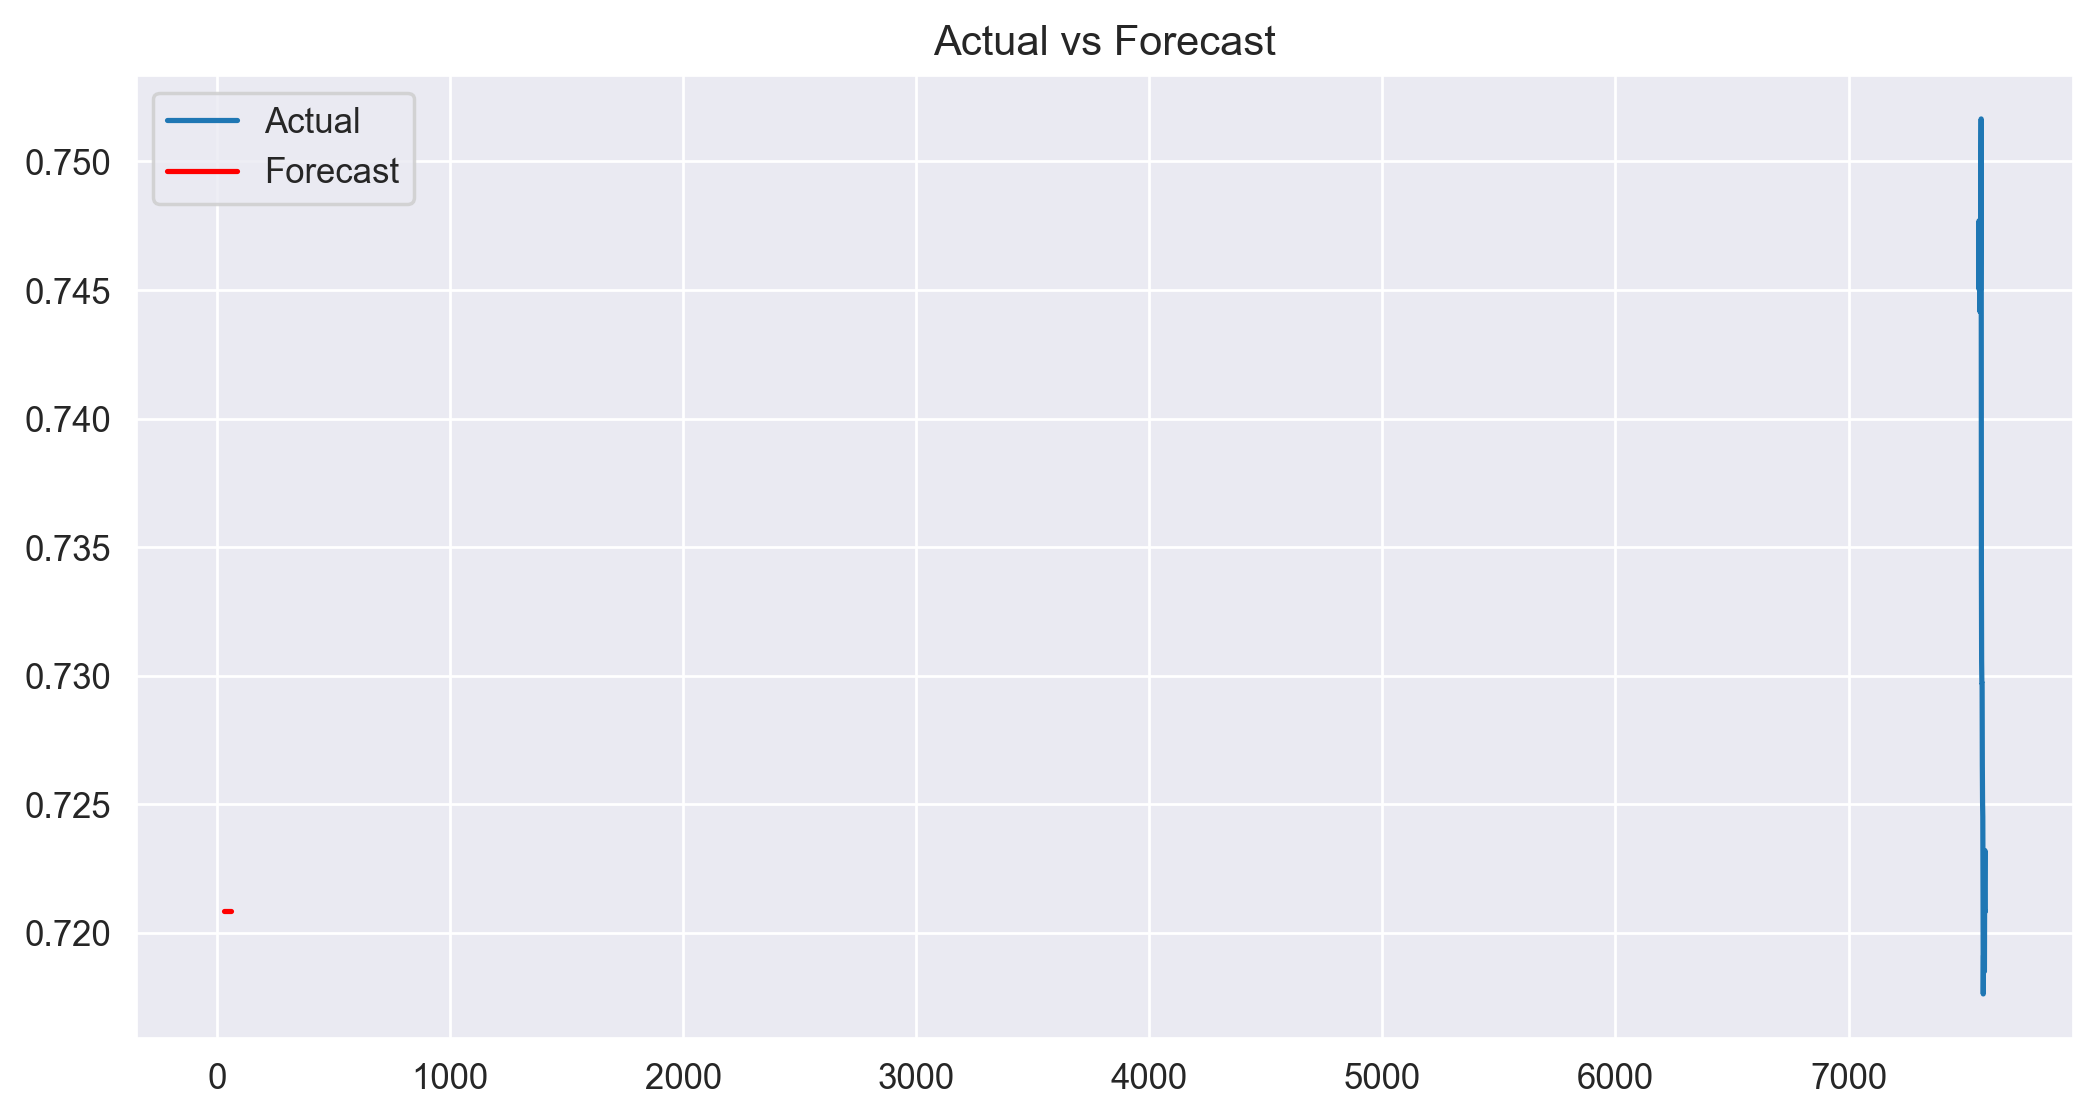

In [60]:
# Out-of-sample forecast
forecast_steps = 30  # Predict for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

# Visualize predictions
plt.figure(figsize=(10, 5))
plt.plot(data, label="Actual")
plt.plot(range(len(data), len(data) + forecast_steps), forecast, label="Forecast", color='red')
plt.legend()
plt.title("Actual vs Forecast")
plt.show()


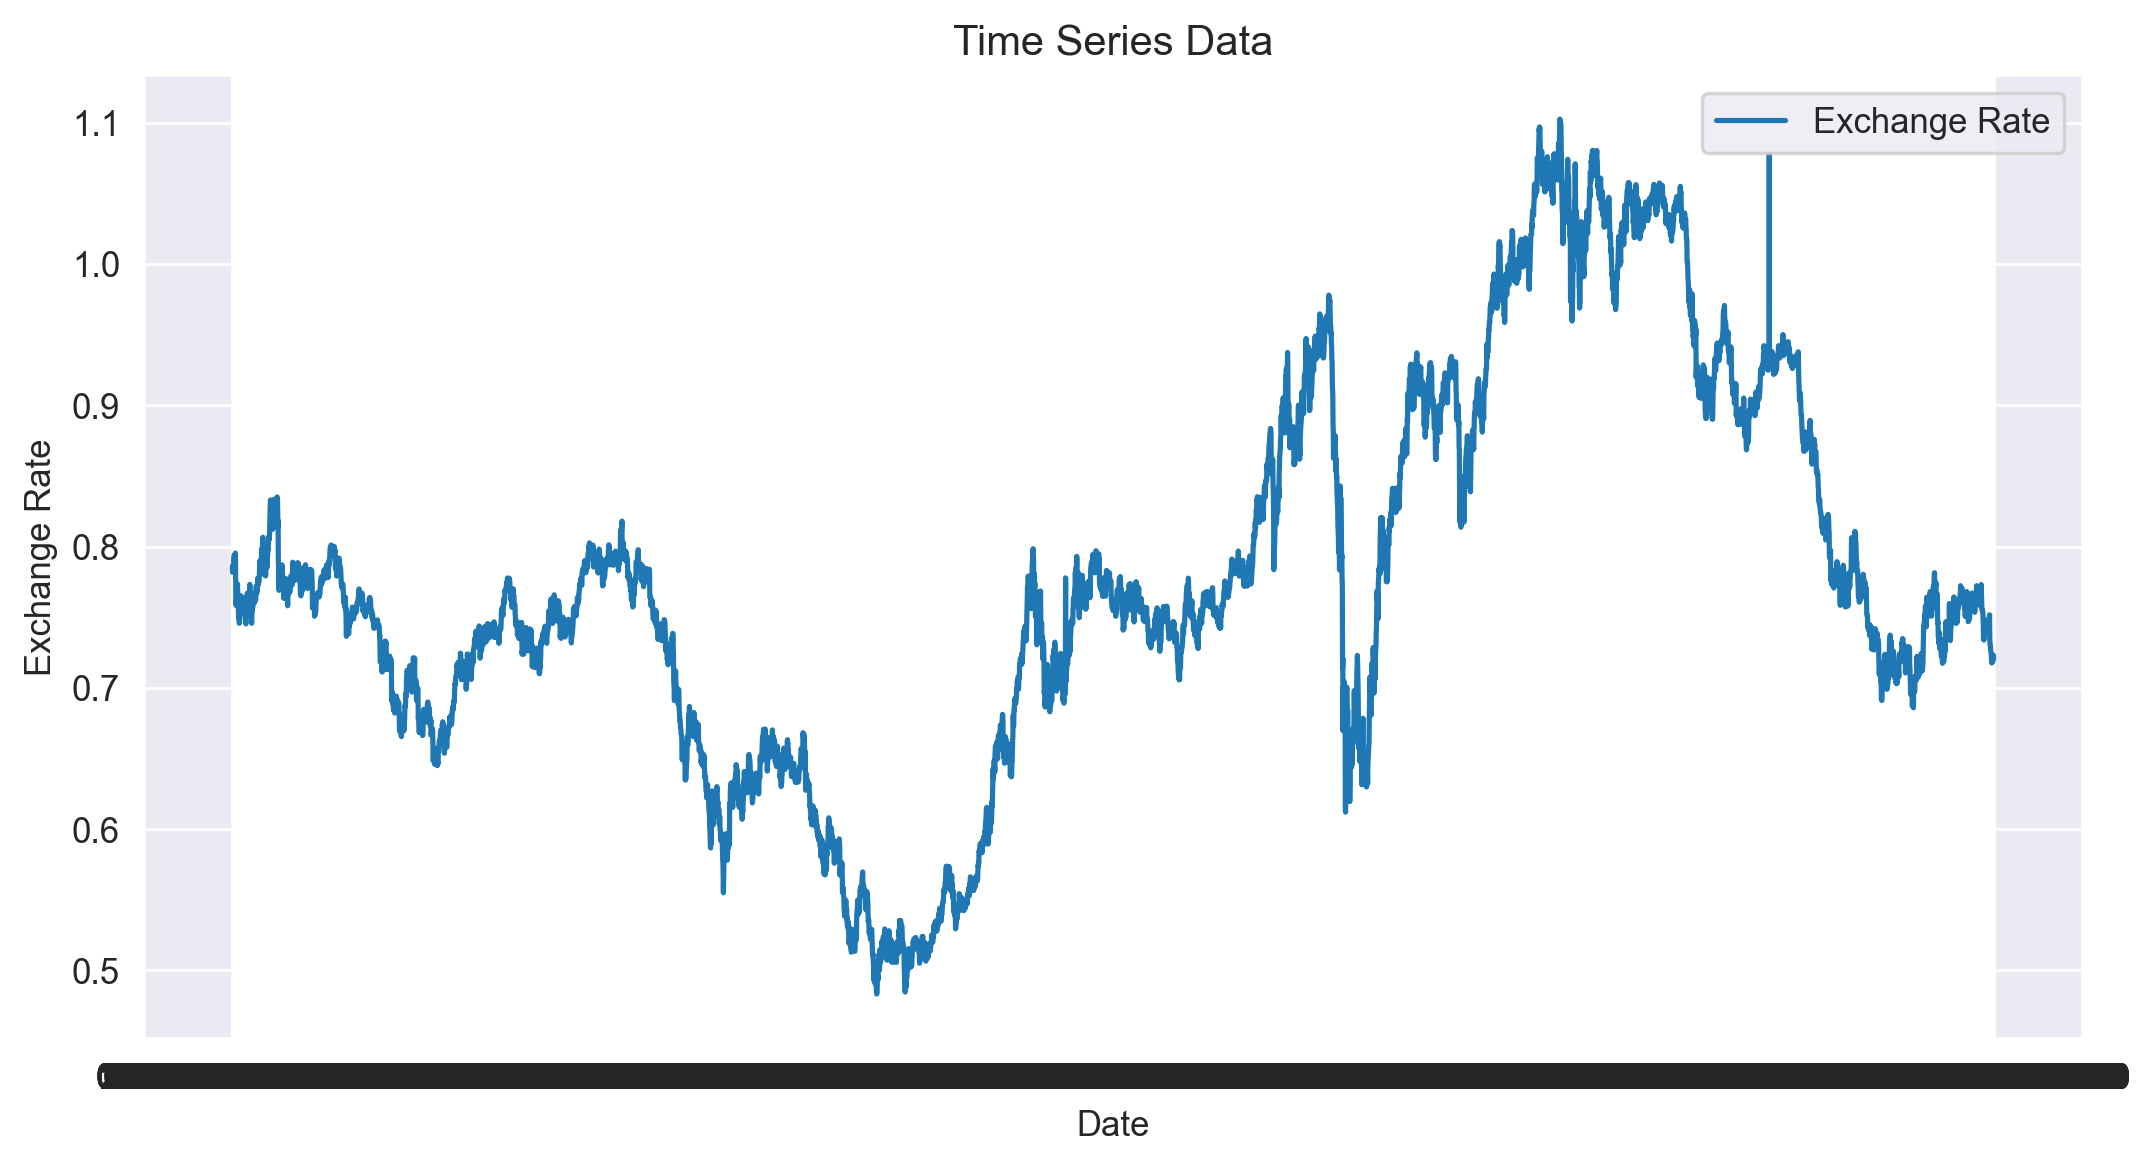

In [62]:
import matplotlib.pyplot as plt

# Plot the data to understand its characteristics
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Ex_rate'], label="Exchange Rate")
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example grid search for seasonal Holt-Winters model
best_aic = float('inf')
best_params = None
for trend in ['add', 'mul', None]:
    for seasonal in ['add', 'mul', None]:
        try:
            model = ExponentialSmoothing(df['Ex_rate'], trend=trend, seasonal=seasonal, seasonal_periods=12)
            fitted_model = model.fit()
            if fitted_model.aic < best_aic:
                best_aic = fitted_model.aic
                best_params = (trend, seasonal)
        except:
            continue

print(f"Best AIC: {best_aic}")
print(f"Best Parameters: {best_params}")


Best AIC: -77644.98075021675
Best Parameters: (None, None)


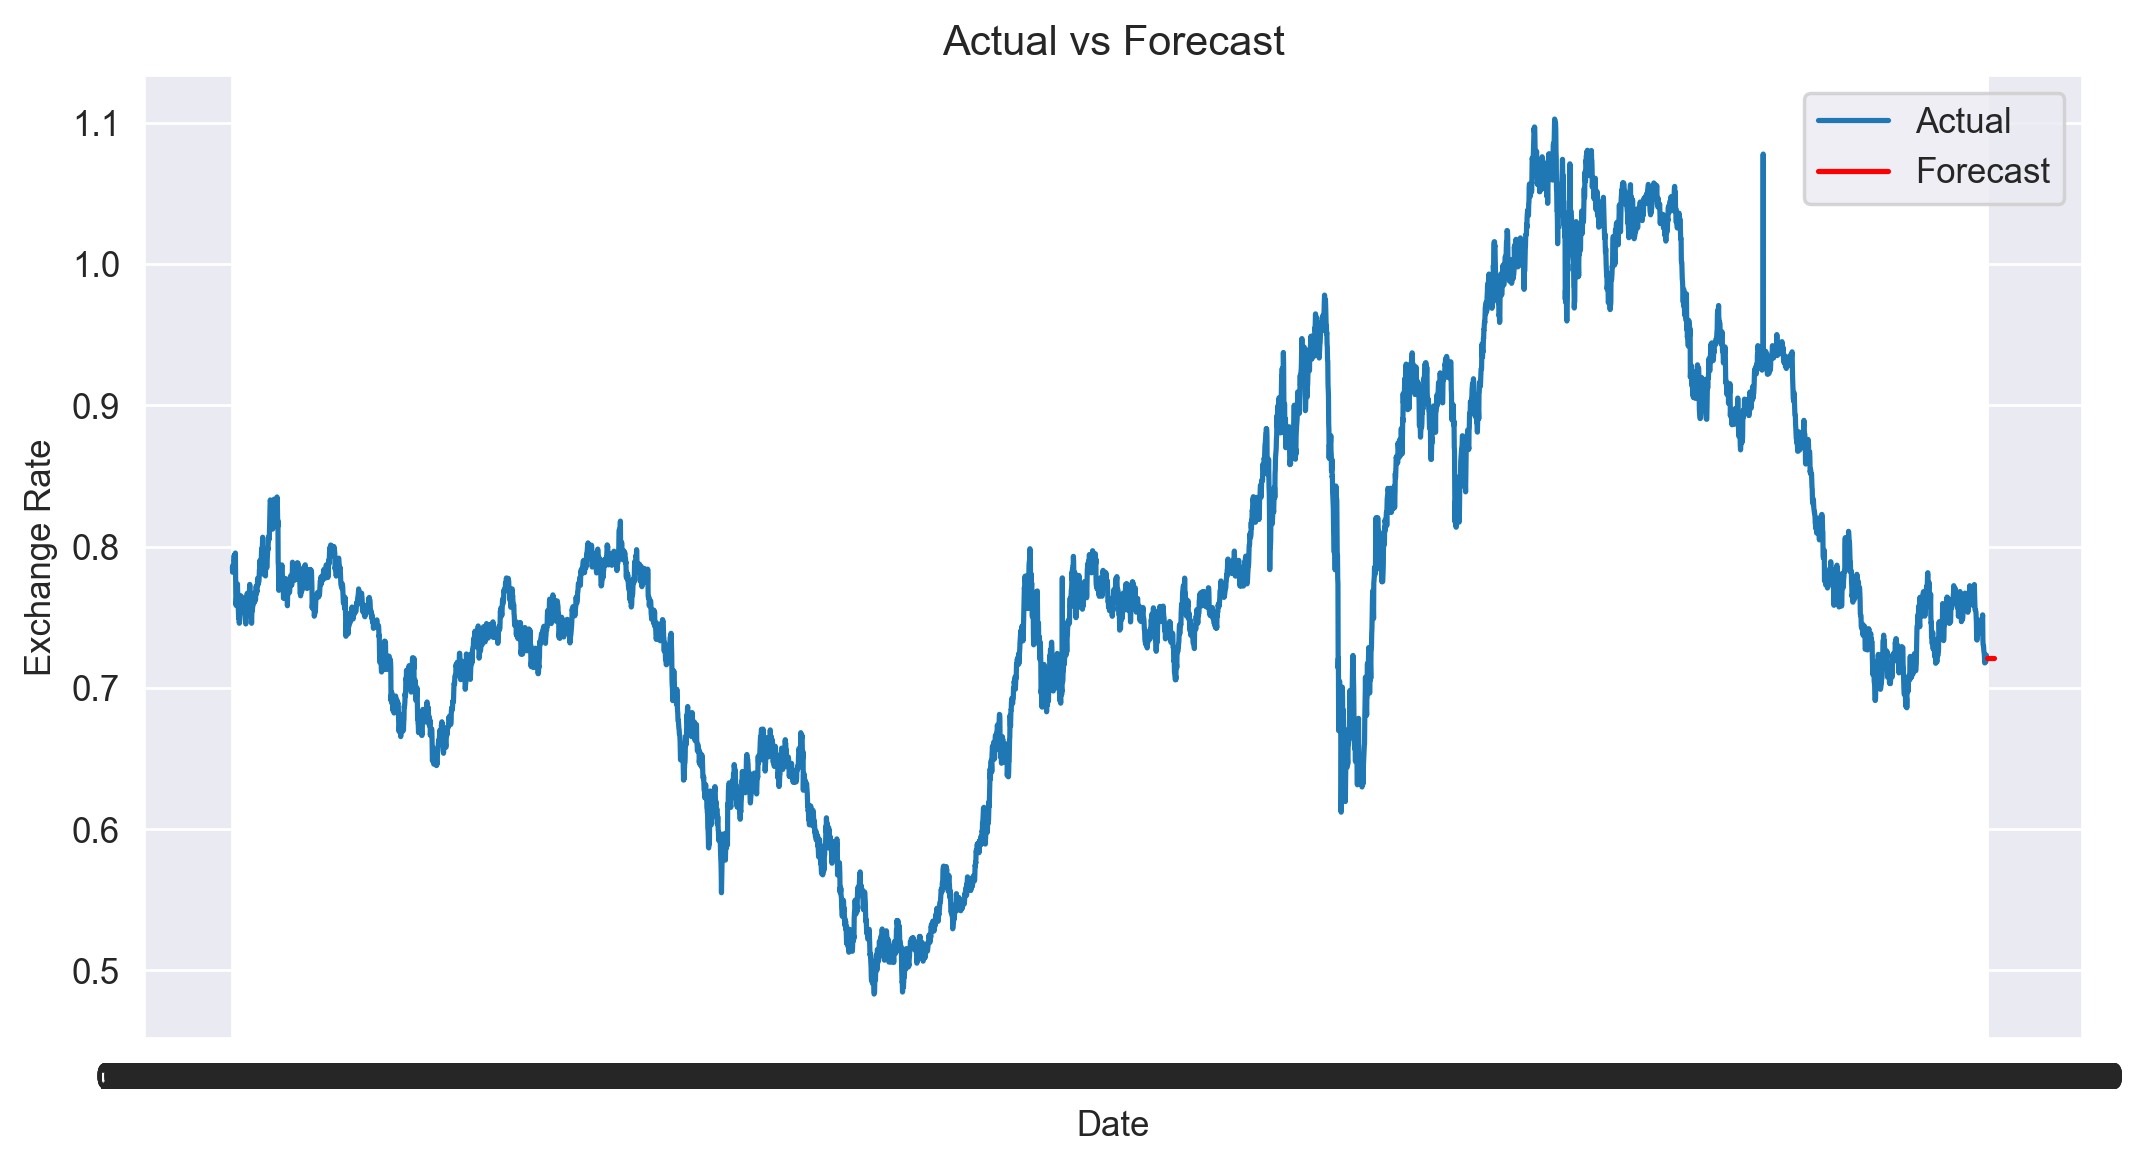

In [66]:
# Example: Fitting Holt-Winters with the optimal parameters
best_trend, best_seasonal = best_params
final_model = ExponentialSmoothing(
    df['Ex_rate'], 
    trend=best_trend, 
    seasonal=best_seasonal, 
    seasonal_periods=12
).fit()

# Forecast future values
forecast_steps = 30
forecast = final_model.forecast(steps=forecast_steps)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Ex_rate'], label="Actual")
plt.plot(
    range(len(df), len(df) + forecast_steps), forecast, 
    label="Forecast", color='red'
)
plt.title("Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [68]:
# Assuming test['Ex_rate'] contains actual values and ypred contains predicted values
actual = test['Ex_rate']
predicted = ypred

# Calculate MAE
mae = mean_absolute_error(actual, predicted)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))

# Calculate MAPE
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 0.013493833511738473
Root Mean Squared Error (RMSE): 0.016634527783604417
Mean Absolute Percentage Error (MAPE): nan%
